In [1]:
import stim
import surface_code
import repetition_code
import HGP_code
import numpy as np

This notebook test codes we constructed on whether they generate the correct syndrome measurement circuits.

### HGP Code

In [2]:
d = 3
noise_profile = [0.01, 0.01, 0.01, 0.01]
Ha = np.array([
    [1, 1, 0],
    [0, 1, 1]
])
Hb = np.array([
    [1, 1, 0],
    [0, 1, 1]
])
my_HGP_code = HGP_code.HGPCode(Ha = Ha, Hb = Hb, d=d)
my_HGP_code.get_info()

{'Hx': array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]]),
 'Hz': array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]]),
 'n_data_qubits': 13,
 'n_x_stabs': 6,
 'n_z_stabs': 6,
 'qubit_coords': [(0, 0),
  (1, 0),
  (2, 0),
  (5, 0),
  (6, 0),
  (0, 1),
  (1, 1),
  (2, 1),
  (5, 1),
  (6, 1),
  (0, 2),
  (1, 2),
  (2, 2),
  (5, 2),
  (6, 2),
  (0, 5),
  (1, 5),
  (2, 5),
  (5, 5),
  (6, 5),
  (0, 6),
  (1, 6),
  (2, 6),
  (5, 6),
  (6, 6)],
 'data_coords_1': [(0, 0),
  (1, 0),
  (2, 0),
  (0, 1),
  (1, 1),
  (2, 

In [3]:
my_HGP_circuit_r3 = my_HGP_code.build_full_HGP_code_circuit(rounds = d, noise_profile=noise_profile , observable_type = "Z")


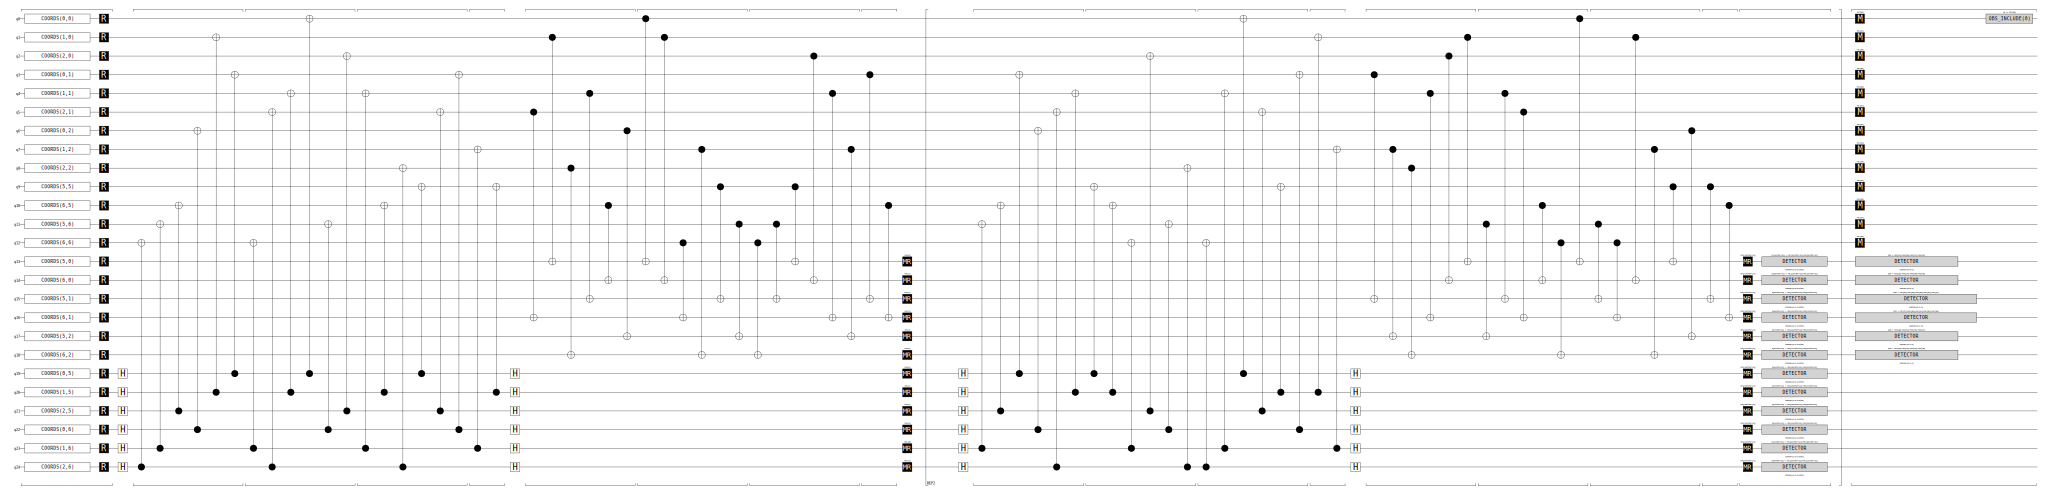

In [4]:
# Visualization: Timeline diagram
my_HGP_circuit_r3.without_noise().diagram("timeline-svg")

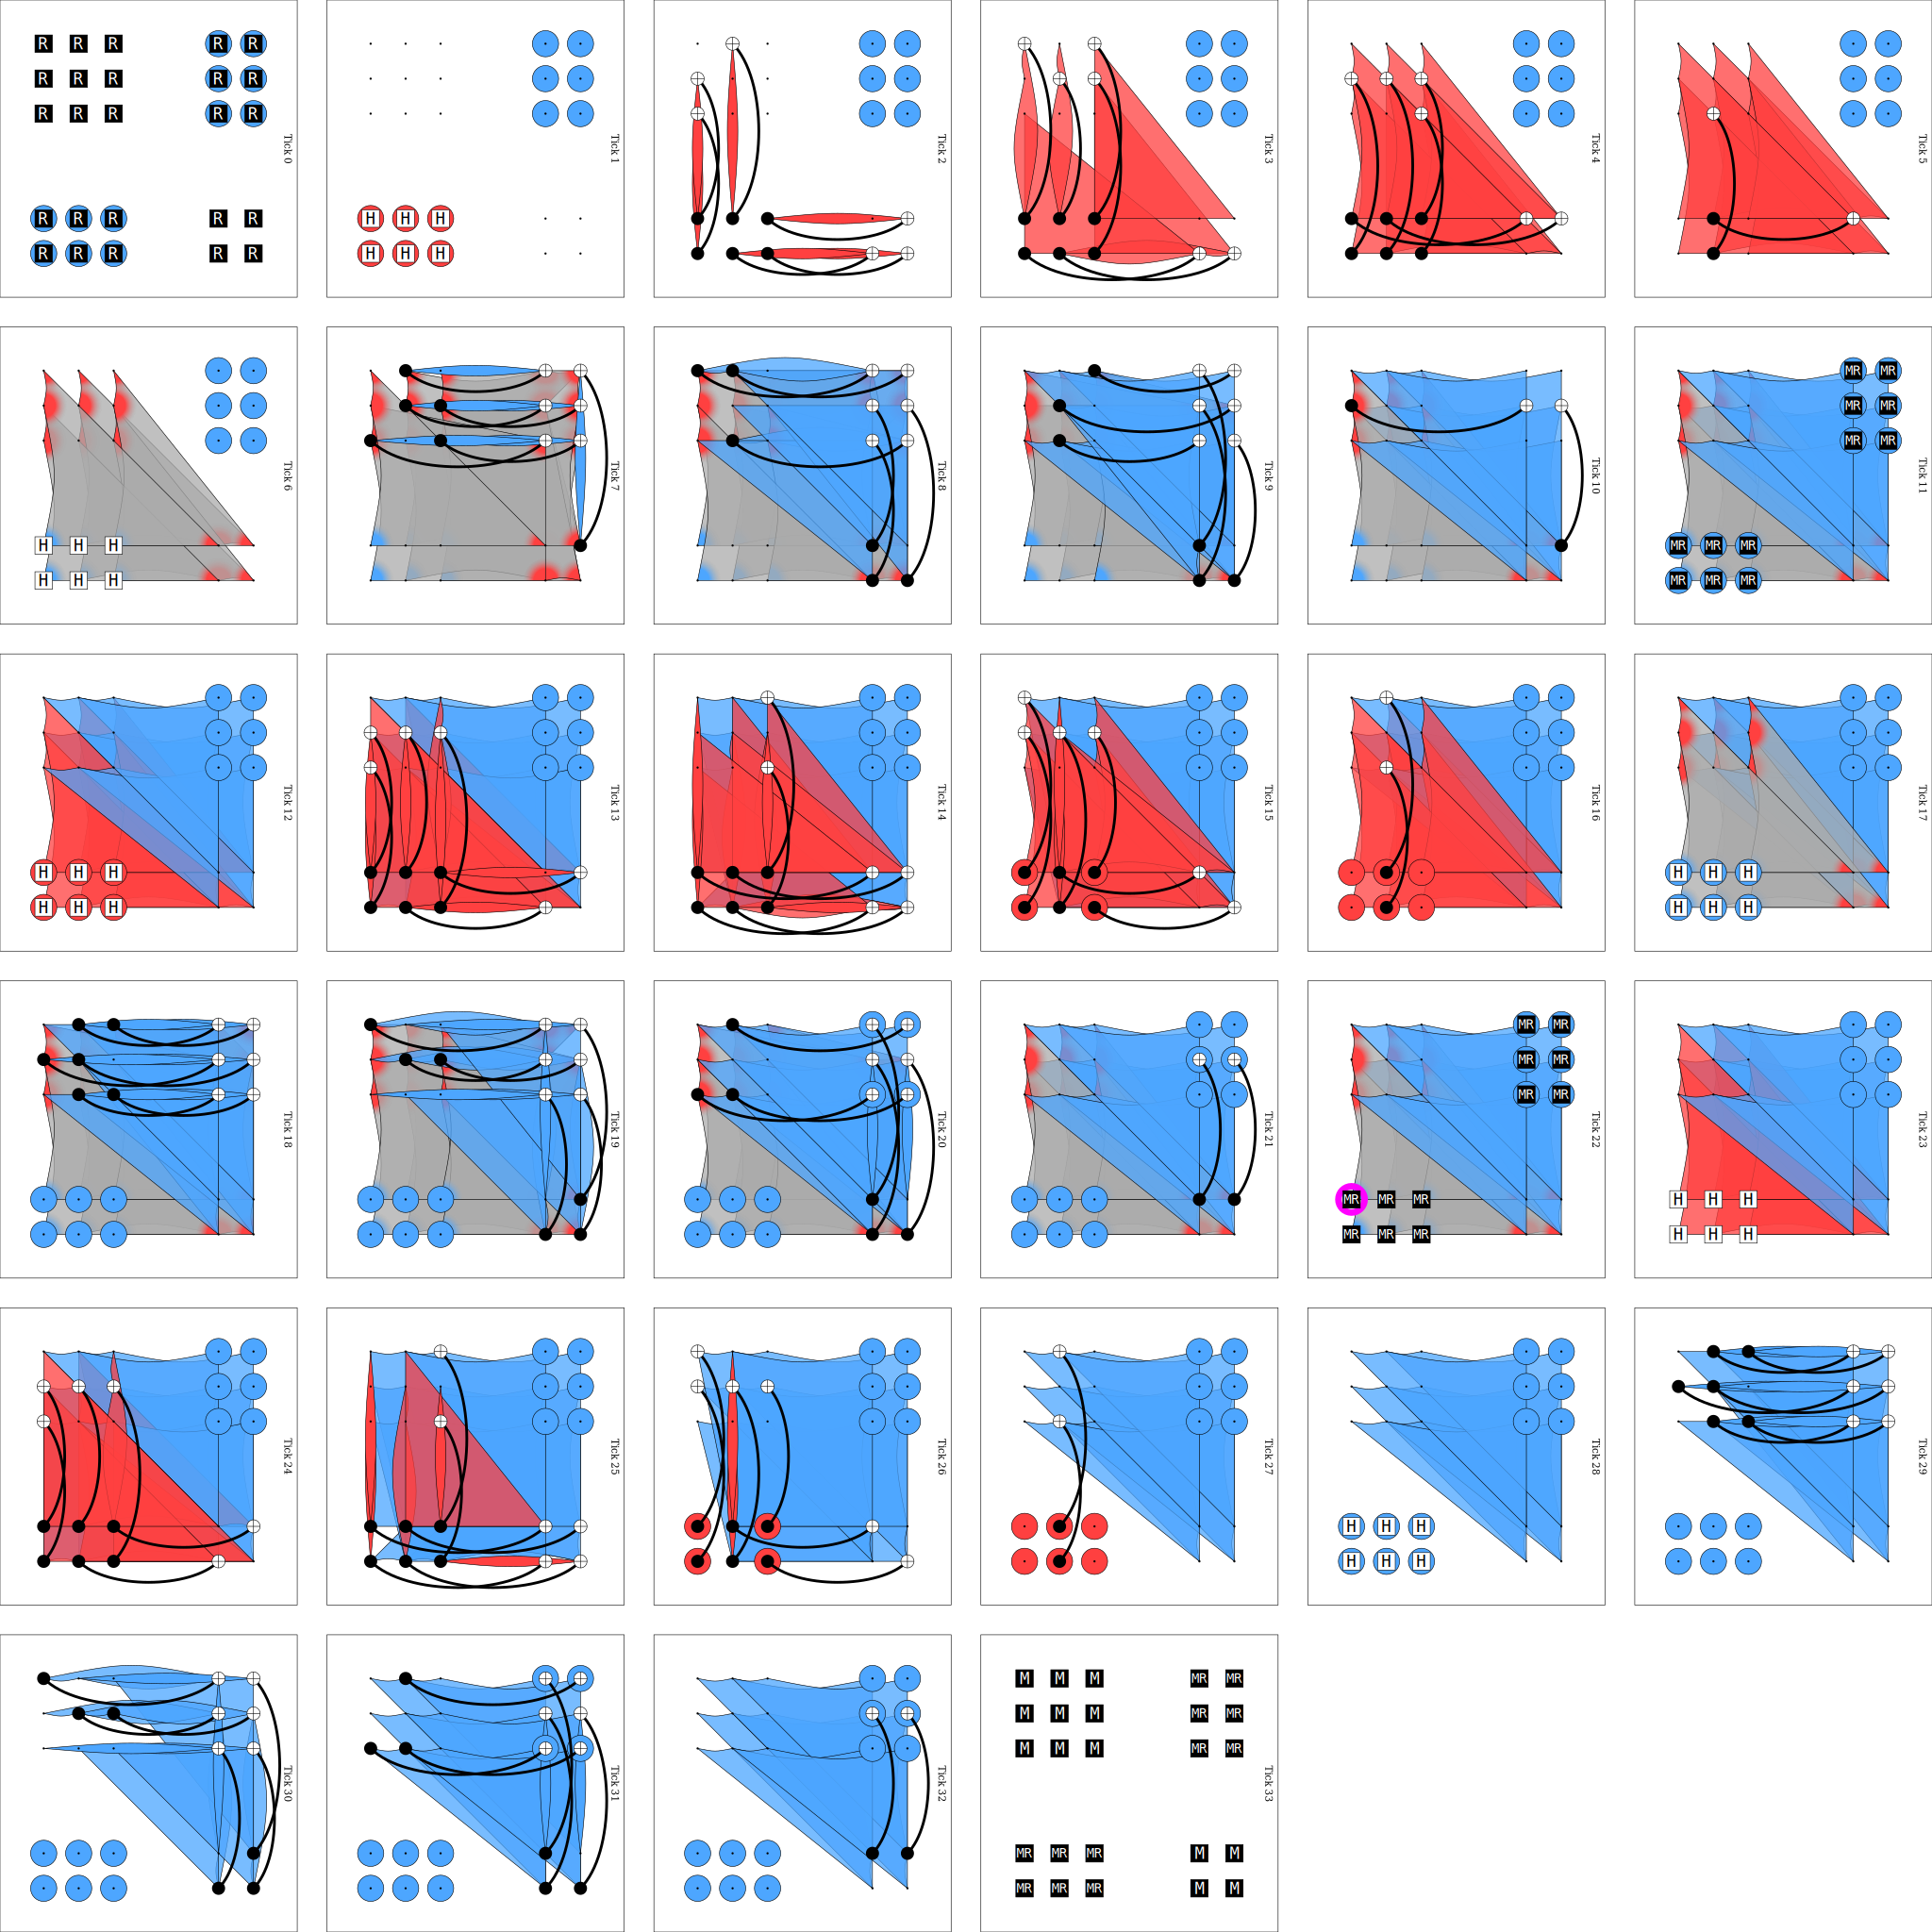

In [5]:
my_HGP_circuit_r3.without_noise().diagram("detslice-with-ops-svg")

In [ ]:
import sinter
import pandas as pd
from stimbposd import sinter_decoders

# === 1. Wrap the circuit in a sinter.Task ===
task = sinter.Task(
    circuit=my_HGP_circuit_r3,
    json_metadata={
        "code": "HGP",
        "d": 3,  # or any meaningful size
        "p": 0.001
    }
)

# === 2. Run simulation with sinter.collect ===
stats = sinter.collect(
    num_workers=1,
    tasks=[task],
    decoders=["bposd"],
    custom_decoders=sinter_decoders(),
    max_shots=10000,     # change as needed
    max_errors=100,      # stop early for low p
    print_progress=True
)

# === 3. Convert stats to DataFrame ===
records = []
for stat in stats:
    d = stat.json_metadata["d"]
    p = stat.json_metadata["p"]
    records.append({
        "decoder": stat.decoder,
        "shots": stat.shots,
        "errors": stat.errors,
        "LER": stat.errors / stat.shots if stat.shots else None,
        "distance": d,
        "p": p,
        "seconds": stat.seconds
    })

df = pd.DataFrame(records)

# Optionally display or save results
print(df)
# df.to_csv("hgp_bposd_results.csv", index=False)
